In [5]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [6]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [7]:
import numpy as np

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target)

In [8]:
# 전처리 - 표준점수
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [9]:
from sklearn.linear_model import SGDClassifier

In [10]:
sc = SGDClassifier(loss='log_loss', max_iter=100) # 로지스틱 함수(이진 크로스 엔트로피 함수) OVR - One Versus  Rest
sc.fit(train_scaled, train_target) # 내부적으로 하나씩 꺼내서

print(sc.score(train_scaled, train_target)) # 학습 세트
print(sc.score(test_scaled, test_target)) # 테스트 세트

0.7478991596638656
0.75


In [11]:
# partial_fit() : 추가학습
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target)) # 학습 세트
print(sc.score(test_scaled, test_target)) # 테스트 세트

0.8487394957983193
0.875


In [14]:
sc = SGDClassifier(loss='log_loss', max_iter=1)

train_score = []
test_score = []

In [15]:
classes = np.unique(train_target)

for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))
    

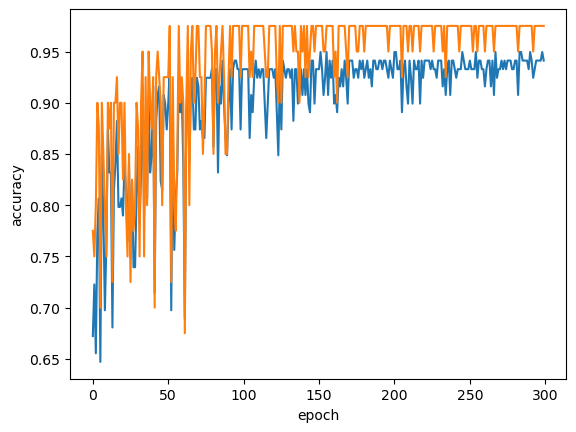

In [17]:
import matplotlib.pyplot as plt

plt.plot(train_score) # 훈련세트 정확도
plt.plot(test_score) # 테스트 세트 정확도
plt.xlabel('epoch') 
plt.ylabel('accuracy')
plt.show()

In [22]:
sc = SGDClassifier(loss='log_loss', max_iter=60, tol=None)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8823529411764706
0.925
